In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import math, copy
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("E:\Technocolabs\Train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [6]:
cat_col = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [7]:
for col in cat_col:
    print(col)
    print(data[col].value_counts())
    print()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
O

In [8]:
item_weight_mean = data.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [9]:
missed = data['Item_Weight'].isnull()
missed

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [10]:
for i, item in enumerate(data['Item_Identifier']):
    if missed[i]:
        if item in item_weight_mean:
            data['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            data['Item_Weight'][i] = np.mean(data['Item_Weight'])
data['Item_Weight'].isnull().sum()

0

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [13]:
miss_bool = data['Outlet_Size'].isnull()
data.loc[miss_bool, 'Outlet_Size'] = data.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
data['Outlet_Size'].isnull().sum()

0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
sum(data['Item_Visibility']==0)

526

In [16]:
data['Item_Visibility'].replace([0],[data['Item_Visibility'].mean()],inplace=True)
sum(data['Item_Visibility']==0)

0

In [17]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [18]:
data['Item_Category']=data['Item_Identifier'].apply(lambda x:x[:2])
data['Item_Category']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Category, Length: 8523, dtype: object

In [19]:
data['Item_Category']=data['Item_Category'].map({'FD':'Food','NC':'Non_Consumable','DR':'Drinks'})
data['Item_Category'].value_counts()

Food              6125
Non_Consumable    1599
Drinks             799
Name: Item_Category, dtype: int64

In [20]:
data.loc[data['Item_Category']=='Non_Consumable','Item_Fat_Content']='Non_Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non_Edible    1599
Name: Item_Fat_Content, dtype: int64

In [21]:
data['Lifetime']=2013 - data['Outlet_Establishment_Year']
data['Lifetime']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Lifetime, Length: 8523, dtype: int64

In [22]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Lifetime
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non_Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non_Consumable,26


<function matplotlib.pyplot.show(close=None, block=None)>

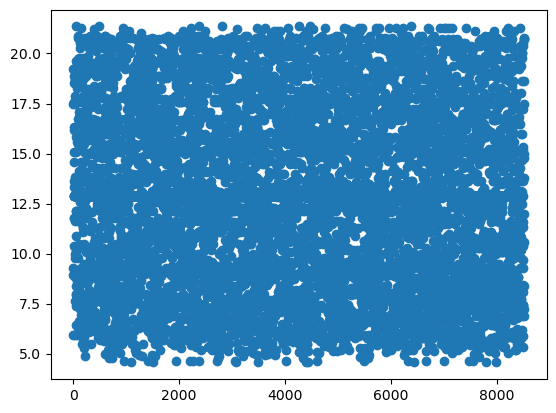

In [23]:
plt.scatter(data.index,data['Item_Weight'])
plt.show

<Axes: xlabel='Item_Weight', ylabel='Density'>

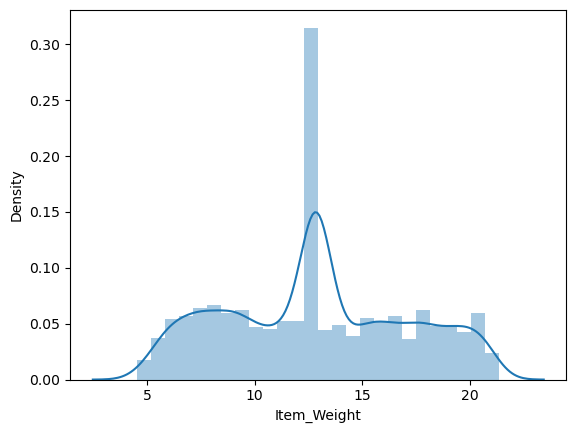

In [24]:
sns.distplot(data['Item_Weight'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

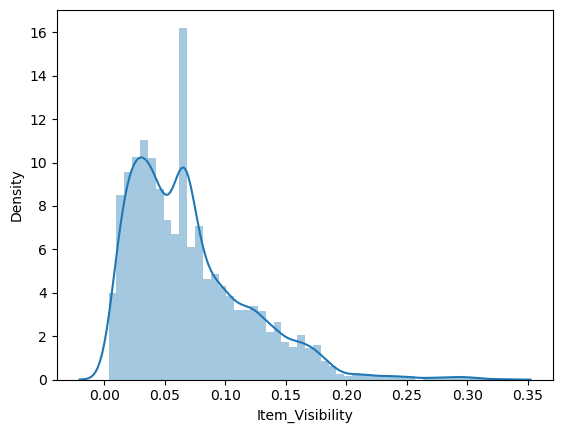

In [25]:
sns.distplot(data['Item_Visibility'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

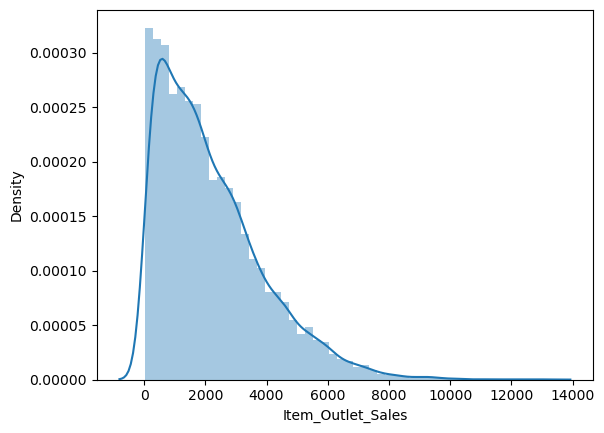

In [26]:
sns.distplot(data['Item_Outlet_Sales'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

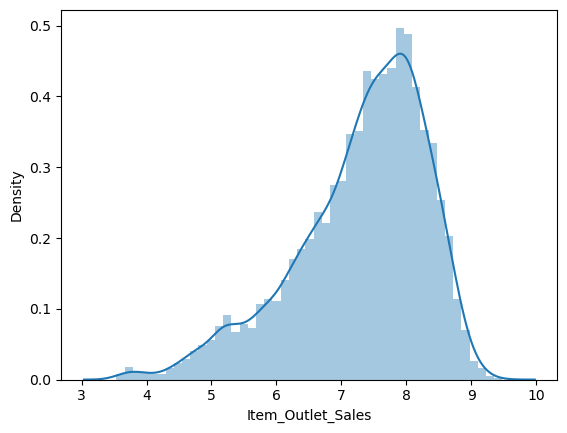

In [27]:
data['Item_Outlet_Sales'] = np.log(1+data['Item_Outlet_Sales'])
sns.distplot(data['Item_Outlet_Sales'])

<Axes: xlabel='Item_Fat_Content', ylabel='Count'>

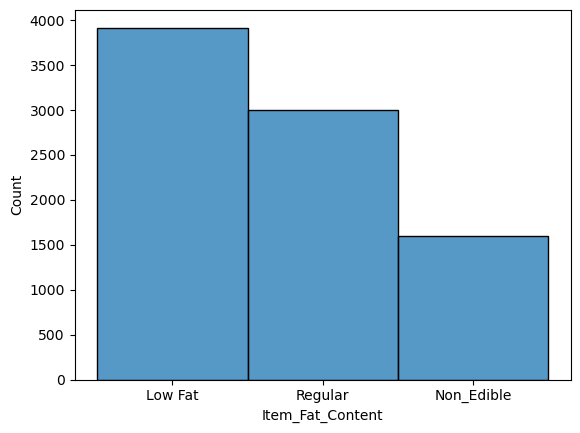

In [28]:
sns.histplot(data['Item_Fat_Content'])

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

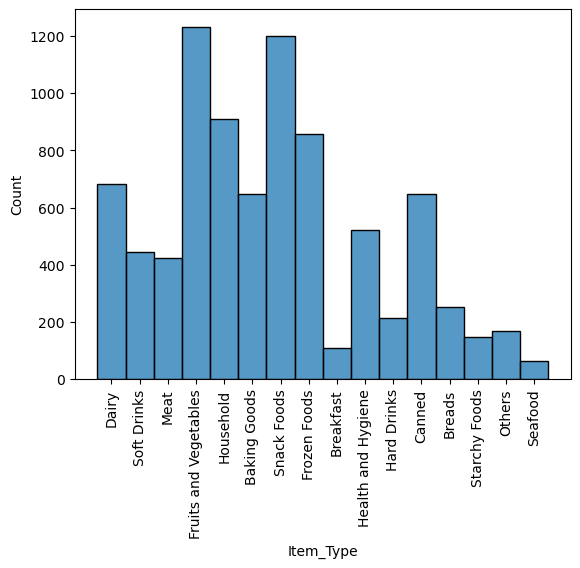

In [29]:
l = list(data['Item_Type'].unique())
c = sns.histplot(data['Item_Type'])
c.set_xticklabels(labels=l, rotation=90)

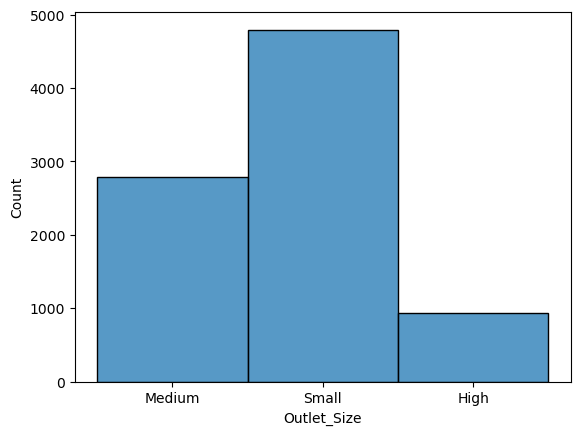

In [30]:
c = sns.histplot(data['Outlet_Size'])

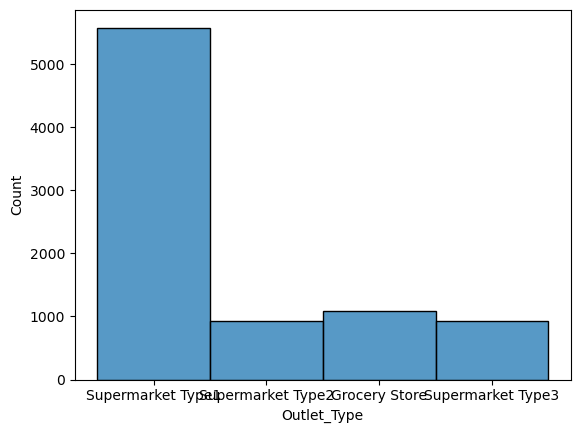

In [31]:
c = sns.histplot(data['Outlet_Type'])

<Axes: >

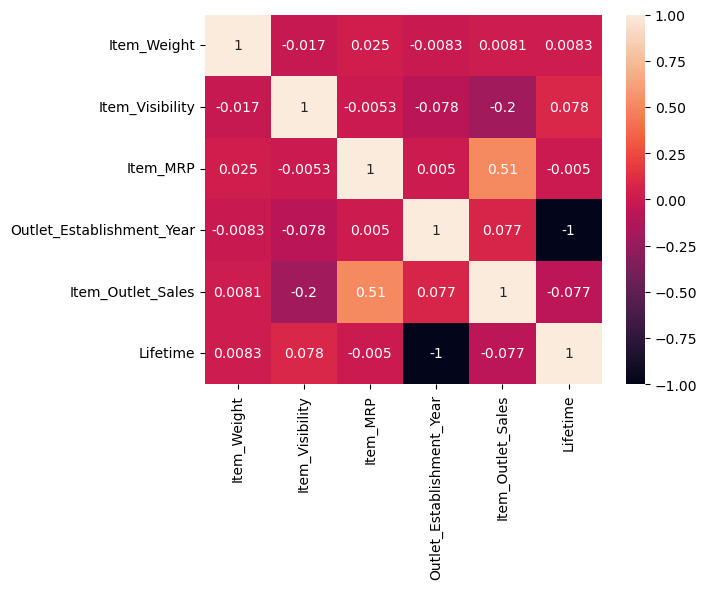

In [32]:
corr = data.corr()
sns.heatmap(corr, annot=True )

In [33]:
label_encoder = preprocessing.LabelEncoder()
data['Item_Fat_Content']=label_encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type']=label_encoder.fit_transform(data['Item_Type'])
data['Outlet_Location_Type']=label_encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']=label_encoder.fit_transform(data['Outlet_Type'])
data['Outlet_Size']=label_encoder.fit_transform(data['Outlet_Size'])
data['Item_Category']=label_encoder.fit_transform(data['Item_Category'])
data['Outlet'] = label_encoder.fit_transform(data['Outlet_Identifier'])

In [34]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Lifetime,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,14,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,4,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,14,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,15,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,26,1


In [35]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Category'])
data.head(5)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Lifetime,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Category_0,Item_Category_1,Item_Category_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


In [36]:
x = data.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = data['Item_Outlet_Sales']

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 0.28800650325017957
CV Score: 0.2891182742641596


<Axes: title={'center': 'Model Coefficients'}>

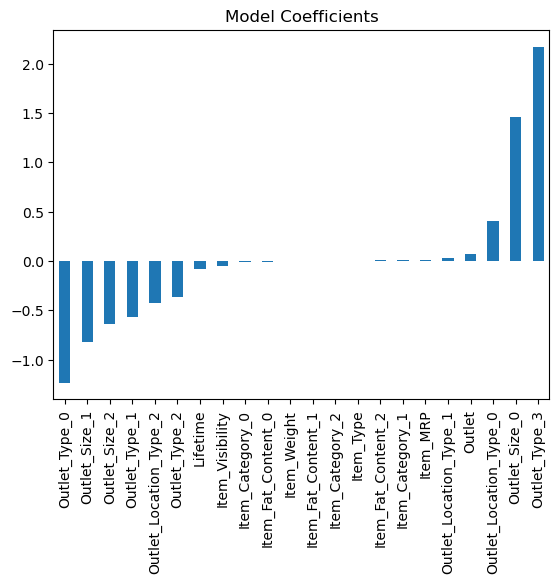

In [82]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

In [83]:
import pickle
filename= 'regression_model.sav'
pickle.dump(model,open(filename,'wb'))

Model Report
MSE: 0.0423343367917218
CV Score: 0.3102589740360874


<Axes: title={'center': 'Feature Importance'}>

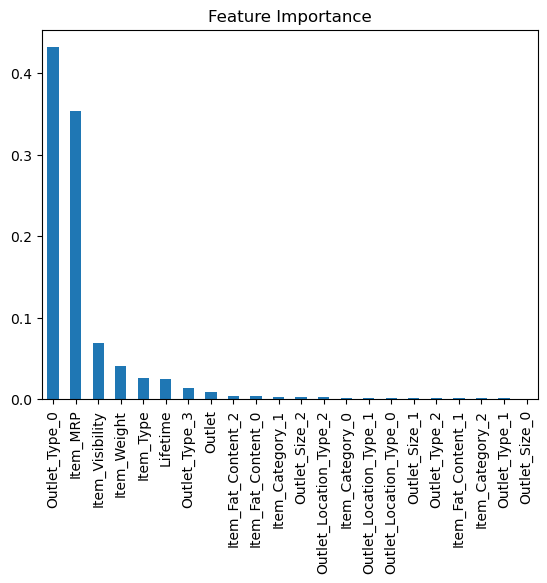

In [70]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [71]:
import xgboost as xgb
dtrain_reg = xgb.DMatrix(x_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(x_test, y_test, enable_categorical=True)

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [73]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

n = 1000
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

In [75]:
from sklearn.metrics import mean_squared_error ,r2_score

preds = model.predict(dtest_reg)
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)#Best fit lineplt.scatter(x, y)


#Results
print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)
#print("Y-intercept :"  , regressor.intercept_)
#print("Slope :" , regressor.coef_)

Mean Squared Error :  0.40027664630767545
R-Squared : 0.6244736783629271


In [76]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
n = 1000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=20
)
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,4.834989,0.002793,4.835434,0.015782
1,3.408055,0.002009,3.408679,0.016401
2,2.416308,0.001613,2.417221,0.017572
3,1.732325,0.001411,1.734249,0.018394
4,1.267064,0.001494,1.271890,0.018849


In [77]:
best_rmse = results['test-rmse-mean'].min()
best_rmse

0.5322041231980854

In [114]:
test=pd.read_csv("E:\Technocolabs\Test.csv")

In [80]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [89]:
item_weight_mean = test.pivot_table(values = "Item_Weight", index = 'Item_Identifier')


In [91]:
missed = test['Item_Weight'].isnull()
for i, item in enumerate(test['Item_Identifier']):
    if missed[i]:
        if item in item_weight_mean:
            test['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            test['Item_Weight'][i] = np.mean(data['Item_Weight'])
test['Item_Weight'].isnull().sum()


0

In [92]:
outlet_size_mode = test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))


In [93]:
miss_bool = test['Outlet_Size'].isnull()
test.loc[miss_bool, 'Outlet_Size'] = test.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
test['Outlet_Size'].isnull().sum()

0

In [94]:
test['Item_Visibility'].replace([0],[test['Item_Visibility'].mean()],inplace=True)
sum(test['Item_Visibility']==0)

0

In [95]:
test['Item_Fat_Content']=test['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
test['Item_Category']=test['Item_Identifier'].apply(lambda x:x[:2])
test['Item_Category']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: Item_Category, Length: 5681, dtype: object

In [96]:
test['Item_Category']=test['Item_Category'].map({'FD':'Food','NC':'Non_Consumable','DR':'Drinks'})
test['Item_Category'].value_counts()

Food              4076
Non_Consumable    1087
Drinks             518
Name: Item_Category, dtype: int64

In [97]:
test.loc[test['Item_Category']=='Non_Consumable','Item_Fat_Content']='Non_Edible'
test['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non_Edible    1087
Name: Item_Fat_Content, dtype: int64

In [98]:
test['Lifetime']=2013 - test['Outlet_Establishment_Year']
test['Lifetime']

0       14
1        6
2       15
3        6
4       28
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Lifetime, Length: 5681, dtype: int64

In [99]:
label_encoder = preprocessing.LabelEncoder()
test['Item_Fat_Content']=label_encoder.fit_transform(test['Item_Fat_Content'])
test['Item_Type']=label_encoder.fit_transform(test['Item_Type'])
test['Outlet_Location_Type']=label_encoder.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type']=label_encoder.fit_transform(test['Outlet_Type'])
test['Outlet_Size']=label_encoder.fit_transform(test['Outlet_Size'])
test['Item_Category']=label_encoder.fit_transform(test['Item_Category'])
test['Outlet'] = label_encoder.fit_transform(test['Outlet_Identifier'])

In [100]:
test = pd.get_dummies(test, columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Category'])
test.head(5)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Lifetime,Outlet,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Category_0,Item_Category_1,Item_Category_2
0,FDW58,20.750000,0.007565,13,107.8622,OUT049,1999,14,9,1,...,1,0,0,0,1,0,0,0,1,0
1,FDW14,8.300000,0.038428,4,87.3198,OUT017,2007,6,2,0,...,0,1,0,0,1,0,0,0,1,0
2,NCN55,14.600000,0.099575,11,241.7538,OUT010,1998,15,0,0,...,0,0,1,1,0,0,0,0,0,1
3,FDQ58,7.315000,0.015388,13,155.0340,OUT017,2007,6,2,1,...,0,1,0,0,1,0,0,0,1,0
4,FDY38,12.857645,0.118599,4,234.2300,OUT027,1985,28,5,0,...,0,0,1,0,0,0,1,0,1,0


In [103]:
x_test = test.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'])


In [113]:
test_pred = model.predict(x_test)
test_pred = np.exp(test_pred)-1
test_pred
test_predictions = pd.DataFrame(test_pred)
test_predictions.to_csv("test_inference.csv")

In [ ]:
test=pd.read_csv("E:\Technocolabs\Test.csv")

In [115]:
test['inference']=test_pred

In [117]:
test.to_csv("test_with_predictions.csv")